In [61]:
# Usefull imports
import numpy as np
import matplotlib.pyplot as plt
import time

In [62]:
# Implementig a class for the resolution of a two body problem
class TwoBodySolver:
    '''
    This class requires just the masses of the two bodies assuming NEWTONIAN POTENTIAL
    '''
    def __init__(self, m_star, m_body, r_start, G=6.67430e-11): # Constructor of the objects of the class
        self.G       = G # Assigns the value of the gravitational constant to the instance variable G
        self.m_star  = m_star # Assigns the mass of the star to the instance variable m_star
        self.m_body  = m_body # Assigns the mass of the small body to the instance variable m_body
        self.r_start = r_start # Assigns the initial value of position to the instance variable r_start
        self.r_star  = np.array([0, 0])  # Star initially at origin in (x, y) coordinates
        self.r_body  = np.array([self.r_start, 0])  # Body initially at distance 1 from star along x-axis
        self.v_star  = np.array([0, 0])  # Star initially at rest
        self.v_body  = np.array([0, np.sqrt(self.G * m_star / np.linalg.norm(self.r_body))])  # Body with circular orbit initial velocity
        #This last line requires further theoretical explanation (view next markdown cell); 
        #code-wide: np.linalg.norm(self.r_body) calculates the magnitude of the position vector

    #Implementing Runge - Kutta to second order (RK2)
    def update_position_velocity(self, dt):
        k1_r, k1_v = self._compute_derivatives(self.r_body, self.v_body)
        k2_r, k2_v = self._compute_derivatives(self.r_body + 0.5 * dt * k1_r, self.v_body + 0.5 * dt * k1_v)
        
        self.r_body = np.array(self.r_body, dtype=float)  # Convert self.r_body to array with float data type
        self.v_body = np.array(self.v_body, dtype=float)  # Convert self.v_body to array with float data type
        
        self.r_body += dt * np.array(k2_r, dtype=float)  # Ensure k2_r has the same data type as self.r_body
        self.v_body += dt * np.array(k2_v, dtype=float)  # Ensure k2_v has the same data type as self.v_body
        
    def _compute_derivatives(self, r, v):
        r_star = self.r_star
        r_norm = np.linalg.norm(r - r_star)
        
        F = -self.G * self.m_star * self.m_body / r_norm**3 * (r - r_star)
        return v, F / self.m_body

**Initial Body Velocity:**
The formula for the initial velocity of an object in circular orbit can be derived from equating the gravitational force with the centripetal force required to keep the object in orbit.

Gravitational Force Formula:
$$
F=G\frac{m_{star}m_{body}}{r^2}
$$​​

Centripetal Force Formula:
The centripetal force required to keep an object of mass $m_{body}$ in circular motion with a velocity $v_{body}$ and radius r is given by:
$$
F=m_{body}\frac{v_{body}^2}{r}
$$

By equating these two forces, we can solve for $v_{body}$ getting:
$$
v_{body} = \sqrt{\frac{Gm_{star}}{r}}
$$

In [63]:
#Function to plot the system

def plot_orbit(solver, num_steps, dt):
    positions = np.zeros((num_steps, 2))
    for i in range(num_steps):
        positions[i] = solver.r_body
        solver.update_position_velocity(dt)
    
    plt.figure(figsize=(8, 6))
    plt.plot(positions[:, 0], positions[:, 1], label='Orbit')
    plt.plot(0, 0, 'yo', label='Star')  # Star at origin
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Orbit of Small Body around Star')
    plt.axis('equal')
    plt.legend()
    plt.grid(True)
    plt.show()
   
 

In [64]:
#TEST PROGRAM
# Parameters
m_star  = 1.989e30  # Mass of the star (e.g., Sun) in kg
m_body  = 5.972e24  # Mass of the small body (e.g., Earth) in kg
r_start = 150e9 # Distance of Earth in m
num_steps = 100000  # Number of time steps
dt = 1000.0  # Time step size in seconds

# Create solver instance
solver = TwoBodySolver(m_star, m_body, r_start)



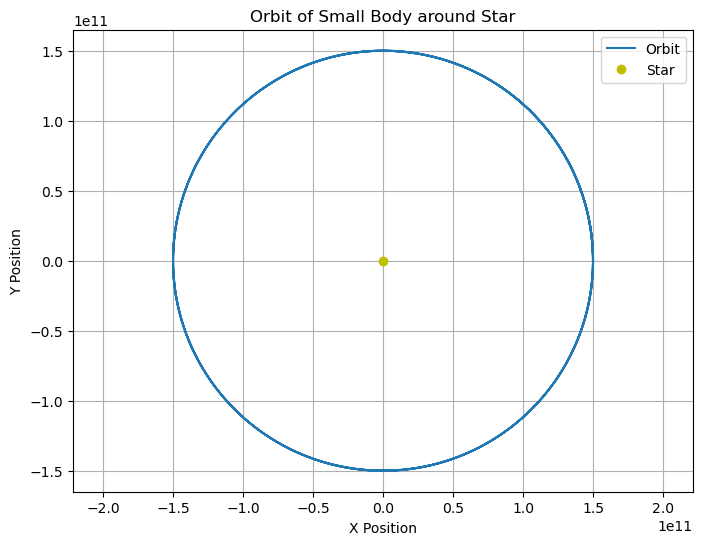

In [65]:
#Plotting
# Plot orbit
plot_orbit(solver, num_steps, dt)